<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;"><a href="http://www.editorialuoc.cat/mineria-de-datos" target="_blank">Minería de datos: Modelos y algoritmos</a></p>
<p style="margin: 0; text-align:right;">Estudios de Informática, Multimedia y Telecomunicación</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Universitat Oberta de Catalunya (<b>UOC</b>)</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# CH13EJ5 Creación de arbol de decisión y mejora con VSD

En este ejemplo se muestra como usar VSD para mejorar la clasificación de un conjunto de datos [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).

## 1. Instalar los packages necesarios

In [1]:
if(!require(car)){
    install.packages('car',repos='http://cran.es.r-project.org')
    require(car)
}
if(!require(C50)){
    install.packages('C50',repos='http://cran.es.r-project.org')
    require(C50)
}
if(!require(gmodels)){
    install.packages('gmodels',repos='http://cran.es.r-project.org')
    require(gmodels)
}
set.seed(606);

Loading required package: car

Warning message:
“package ‘car’ was built under R version 3.5.2”
Loading required package: carData

Warning message:
“package ‘carData’ was built under R version 3.5.2”
Loading required package: C50

Loading required package: gmodels



## 2. Carga de los datos

Leer el conjunto de datos original desde su URL en el repositorio **UCI Machine Learning**.

In [2]:
wdbc <- read.table(
    url("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"), 
    sep=",", header=FALSE)

### Obtener las dimensiones (N y d) del conjunto de datos

In [3]:
head(wdbc)
dim(wdbc)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>
1,1000025,5,1,1,1,2,1,3,1,1,2
2,1002945,5,4,4,5,7,10,3,2,1,2
3,1015425,3,1,1,1,2,2,3,1,1,2
4,1016277,6,8,8,1,3,4,3,7,1,2
5,1017023,4,1,1,3,2,1,3,1,1,2
6,1017122,8,10,10,8,7,10,9,7,1,4


[1] 699  11

### Corrección de datos

- Recodificar los '?' por NA 
- Filtrar los valores ausentes (i.e. quedarse solo con los registros completos)

In [4]:
wdbc$V7=as.numeric(recode(wdbc$V7, "'?'=NA"))

y=wdbc[complete.cases(wdbc),]

head(y)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,1000025,5,1,1,1,2,1,3,1,1,2
2,1002945,5,4,4,5,7,2,3,2,1,2
3,1015425,3,1,1,1,2,3,3,1,1,2
4,1016277,6,8,8,1,3,5,3,7,1,2
5,1017023,4,1,1,3,2,1,3,1,1,2
6,1017122,8,10,10,8,7,2,9,7,1,4


Normalizamos el juego de datos para evitar que unas variables tengan más relevancia que otras, 
simplemente por el hecho de estar expresadas en magnitudes más grandes.

In [5]:
x <- as.data.frame(cbind(y[,1],scale(y[,2:11])))
class(x)

[1] "data.frame"

### Partición del *dataset*

Particionar el conjunto de entrada en dos (training y test set), según la regla del 2/3

In [6]:
N=dim(x)[1]
all=seq(1,N)

# seleccionar 2/3 al azar
train=sort(sample(N,N*2/3.0))
test=setdiff(all,train)

xtrain=x[train,]
xtest=x[test,]

Revisar que haya una representación parecida en la variable clasificadora del conjunto de entreno y test.

In [7]:
prop.table(table(xtrain$V11))
prop.table(table(xtest$V11))


-0.733144027377551   1.36199141487712 
         0.6549451          0.3450549 


-0.733144027377551   1.36199141487712 
         0.6403509          0.3596491 

## 3. Crear un primer árbol 

Crear un primer árbol usando todos los parámetros por defecto y dibujarlo


Call:
C5.0.default(x = xtrain[, c(2:10)], y = as.factor(xtrain$V11))

Classification Tree
Number of samples: 455 
Number of predictors: 9 

Tree size: 4 

Non-standard options: attempt to group attributes



Call:
C5.0.default(x = xtrain[, c(2:10)], y = as.factor(xtrain$V11))


C5.0 [Release 2.07 GPL Edition]  	Tue Oct 20 16:59:16 2020
-------------------------------

Class specified by attribute `outcome'

Read 455 cases (10 attributes) from undefined.data

Decision tree:

V3 <= -0.3754489: -0.733144027377551 (284/7)
V3 > -0.3754489:
:...V7 > -0.5655993: 1.36199141487712 (151/8)
    V7 <= -0.5655993:
    :...V3 <= 0.6032977: -0.733144027377551 (14/1)
        V3 > 0.6032977: 1.36199141487712 (6)


Evaluation on training data (455 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     4   16( 3.5%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	   290     8    (a): class -0.733144027377551
	     8   149    (b): class 1.36199141487712


	Attribute usage:

	100.00%	V3
	 37.58%	V7


Time: 0.0 secs


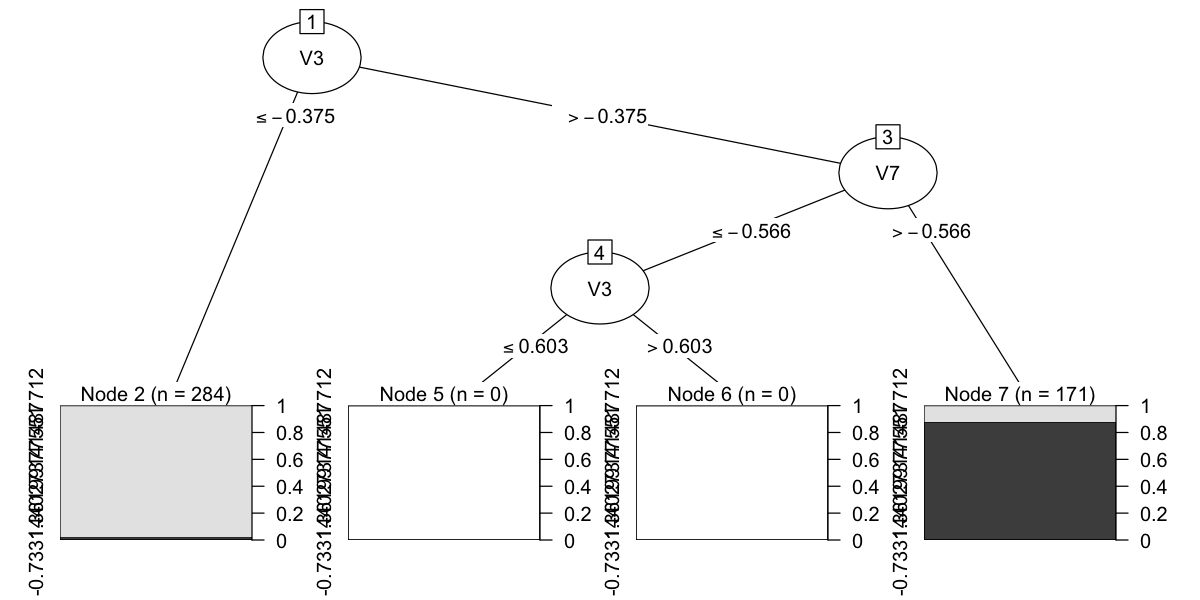

In [8]:
model1 <- C50::C5.0(xtrain[,c(2:10)],as.factor(xtrain$V11))
model1
summary(model1)
options(repr.plot.width=10, repr.plot.height=5)
plot(model1)

### Evaluación de la calidad

Evaluar el árbol creado mediante la matriz de confusión para cada subconjunto

In [9]:
V11_pred <- predict(model1, xtest)
CrossTable(xtest$V11,V11_pred,prop.chisq=FALSE,prop.c=FALSE,prop.r=FALSE,dnn = c('actual V11','predicted V11'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  228 

 
                   | predicted V11 
        actual V11 | -0.733144027377551 |   1.36199141487712 |          Row Total | 
-------------------|--------------------|--------------------|--------------------|
-0.733144027377551 |                137 |                  9 |                146 | 
                   |              0.601 |              0.039 |                    | 
-------------------|--------------------|--------------------|--------------------|
  1.36199141487712 |                  7 |                 75 |                 82 | 
                   |              0.031 |              0.329 |                    | 
-------------------|--------------------|--------------------|--------------------|
      Column Total |                144 |                 84 |                228 | 
-------------------|---------

El **error del árbol es del 0,07**. Es decir, sólo 16 casos se clasifican incorrectamente. Veamos si es mejorable con la técnica de SVD.

## 4. Utilizar SVD para extraer características

### Aplicar SVD al dataset

In [10]:
TipoCancer <- xtrain[,11]
VarCancer <- xtrain[,2:10]

svdVarCancer <- svd(VarCancer)
svdVarCancerT <- svd(xtest[,2:10])

Porcentaje de la varianza acumulada explicada 

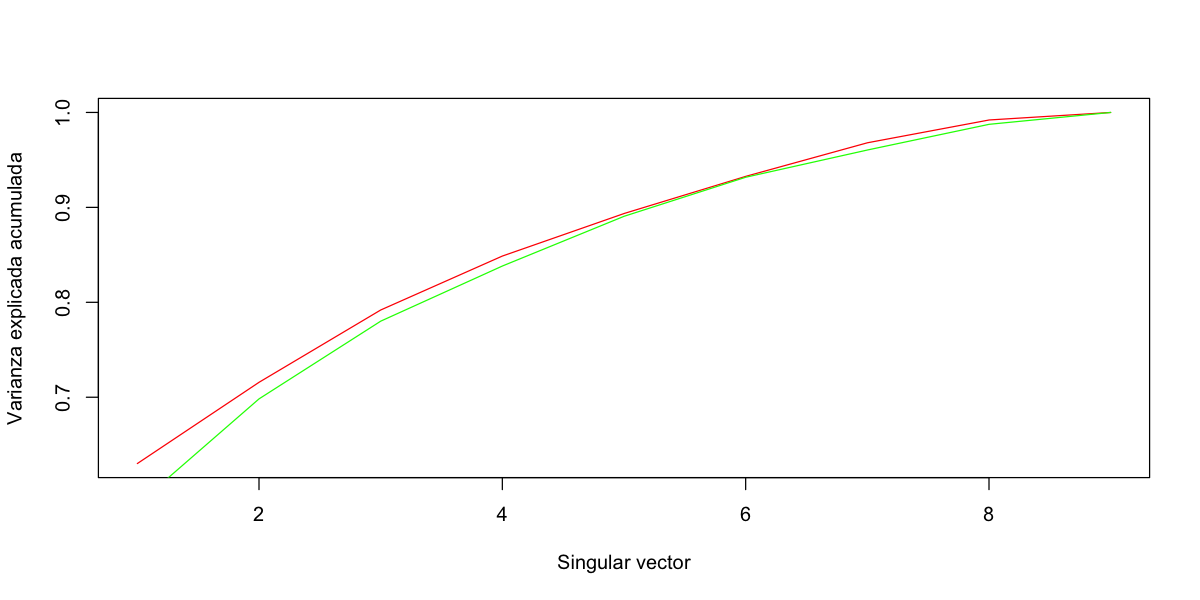

In [11]:
plot(cumsum(svdVarCancer$d^2/sum(svdVarCancer$d^2)),type="l",col="red",xlab="Singular vector",ylab="Varianza explicada acumulada")
lines(cumsum(svdVarCancerT$d^2/sum(svdVarCancerT$d^2)),col="green")

Añadir una nueva variable C1 a los datos usando el primer SVD que ya acumula 85% de varianza

In [12]:
xtrain$C1=svdVarCancer$u[,1]
xtest$C1=svdVarCancerT$u[,1]

## 5. Crear un segundo árbol 

Crear un segundo árbol con la nueva variable usando todos los parámetros por defecto y dibujarlo


Call:
C5.0.default(x = xtrain[, c(2:10, 12)], y = as.factor(xtrain$V11))

Classification Tree
Number of samples: 455 
Number of predictors: 10 

Tree size: 2 

Non-standard options: attempt to group attributes



Call:
C5.0.default(x = xtrain[, c(2:10, 12)], y = as.factor(xtrain$V11))


C5.0 [Release 2.07 GPL Edition]  	Tue Oct 20 17:02:08 2020
-------------------------------

Class specified by attribute `outcome'

Read 455 cases (11 attributes) from undefined.data

Decision tree:

C1 <= 0.004016426: 1.36199141487712 (164/8)
C1 > 0.004016426: -0.733144027377551 (291/1)


Evaluation on training data (455 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     2    9( 2.0%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	   290     8    (a): class -0.733144027377551
	     1   156    (b): class 1.36199141487712


	Attribute usage:

	100.00%	C1


Time: 0.0 secs


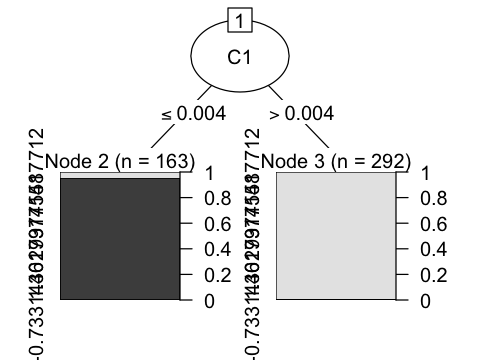

In [13]:
model2 <- C50::C5.0(xtrain[,c(2:10,12)],as.factor(xtrain$V11))
model2
summary(model2)
options(repr.plot.width=4, repr.plot.height=3)
plot(model2)

Observar que para la creación el árbol **solo se ha usado la variable que corresponde con el componente 1**. El resto de variables se ha descartado.

### Evaluar el árbol creado mediante la matriz de confusión para cada subconjunto

In [14]:
V11_pred <- predict(model2, xtest)
CrossTable(xtest$V11,V11_pred,prop.chisq=FALSE,prop.c=FALSE,prop.r=FALSE,dnn = c('actual V11','predicted V11'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  228 

 
                   | predicted V11 
        actual V11 | -0.733144027377551 |   1.36199141487712 |          Row Total | 
-------------------|--------------------|--------------------|--------------------|
-0.733144027377551 |                139 |                  7 |                146 | 
                   |              0.610 |              0.031 |                    | 
-------------------|--------------------|--------------------|--------------------|
  1.36199141487712 |                  0 |                 82 |                 82 | 
                   |              0.000 |              0.360 |                    | 
-------------------|--------------------|--------------------|--------------------|
      Column Total |                139 |                 89 |                228 | 
-------------------|---------

Tenemos una **tasa del 0,096 de error en clasificación**. Es decir, se ha incrementado. Hemos logrado reducir las clasificaciones erroneas de tumor maligno a 0 reduciendose la misma tasa de falsos positivos de 9 a 7.